In [3]:
import pandas as pd 
import sklearn as sk
import numpy as np
import talib 
from talib import abstract
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
# from xgboost import XGBRegressor, XGBClassifier
# import tuneta
# import pandas_ta as ta
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# import lightgbm as lgb
import os

from sklearn.gaussian_process import GaussianProcessRegressor

In [215]:
src = '../James_100/'

label = pd.read_csv(src + "100_label.csv")
margin = pd.read_csv(src + "100_feature_past_6_months_margin_short.csv")
ohlcv = pd.read_csv(src + "100_feature_past_6_months_ohlcv.csv")
# trans = pd.read_csv(src + "transaction_details.csv")
industry = pd.read_csv(src + "stock_industry.csv")

In [13]:
def calculate_feature(id):
    output = pd.DataFrame()
    for j in range(len(label[label["stock_id"] == id])):
        df = ohlcv[ohlcv["stock_id"] == id].drop(columns=["stock_id","date"]).iloc[j*180:(j+1)*180]
        date = ohlcv[ohlcv["stock_id"] == id][["date","stock_id"]].iloc[j*180:(j+1)*180]
        df = df.astype('float')
        for i in talib.get_functions():
            try:
                # result = eval('abstract.' + {i} + f'ohlcv[ohlcv["stock_id"] == "{2330}"])')
                result = eval('abstract.'+ i + f'(ohlcv[ohlcv["stock_id"] == {id}])')

                result.name = i.lower() if type(result) == pd.core.series.Series else None
                df = pd.merge(df,pd.DataFrame(result),left_on= df.index,right_on=result.index)
                df = df.set_index("key_0")
            except:
                print(i)
        df = pd.merge(date,df,left_index=True,right_index=True) # Specify left_on parameter
        space = pd.merge(df.tail(1),label[label["stock_id"] == id].iloc[j:j + 1],on="stock_id")
        print(j)
        output = pd.concat([output,space])
    return output

In [14]:
result = pd.DataFrame()
for id in ohlcv["stock_id"].unique():
    out = calculate_feature(id)
    result = pd.concat([result,out])

MAVP
0
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
8
MAVP
9
MAVP
10
MAVP
11
MAVP
12
MAVP
13
MAVP
14
MAVP
15
MAVP
16
MAVP
17
MAVP
18
MAVP
19
MAVP
20
MAVP
21
MAVP
22
MAVP
23
MAVP
24
MAVP
25
MAVP
26
MAVP
27
MAVP
28
MAVP
29
MAVP
30
MAVP
31
MAVP
32
MAVP
33
MAVP
0
MAVP
0
MAVP
0
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
0
MAVP
1
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
0
MAVP
1
MAVP
2
MAVP
0
MAVP
1
MAVP
2
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
8
MAVP
9
MAVP
10
MAVP
11
MAVP
12
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
8
MAVP
9
MAVP
10
MAVP
11
MAVP
12
MAVP
13
MAVP
14
MAVP
15
MAVP
0
MAVP
1
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
4
MAVP
5
MAVP
6
MAVP
7
MAVP
8
MAVP
9
MAVP
10
MAVP
11
MAVP
12
MAVP
13
MAVP
14
MAVP
15
MAVP
16
MAVP
17
MAVP
18
MAVP
19
MAVP
0
MAVP
1
MAVP
2
MAVP
3
MAVP
0
MAVP
1
MAVP
2
MAVP


In [16]:
result.to_csv('./processed.csv')

In [55]:
result = pd.read_csv(src + "result.csv")

In [56]:
result['date'] = pd.to_datetime(result['date'])

In [57]:
test = result.copy()
X = test.copy().drop(columns=["Unnamed: 0_x","open","close","high","low", "stock_id","acos","asin","profit(%)","buy_price","buy_date", "sell_date","volume","amount","cosh","exp","sinh","Unnamed: 0_y","sell_price","sell_price","lowest_price","highest_price","MAE","BMFE","GMFE"])
X_train = X[X['date'].dt.year <= 2020].drop(columns=["date"])
X_test = X[X['date'].dt.year >= 2021].drop(columns=["date"])

## Feature distribution overlap

In [58]:
stat_train = X_train.describe()

In [59]:
stat_test = X_test.describe()

In [60]:
stat_train

,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,leadsine,ht_trendmode,add,div,max_x,...,stddev,tsf,var,atr,natr,trange,ad,adosc,obv,mfs_score
count,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,...,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7.983000e+03,7.983000e+03,7.983000e+03,7983.000000
mean,21.991169,136.440001,-0.372150,0.528739,-0.051057,-0.133770,0.839659,167.595449,1.031159,92.877518,...,1.920574,83.788600,18.627292,3.022704,3.608109,3.025366,-1.591323e+09,-2.091077e+06,2.174274e+09,68.790680
std,5.179970,99.243920,13.230906,15.814894,0.602796,0.713283,0.366945,175.870980,0.020829,100.636277,...,3.865302,87.249738,182.641128,4.318576,3.000570,4.876615,4.616728e+09,1.306070e+07,4.573365e+09,7.284267
min,9.992834,-44.856146,-354.793264,-288.156190,-0.999999,-1.000000,0.000000,11.550000,1.000000,6.930000,...,0.020000,-43.223077,0.000400,0.087849,0.684915,0.050000,-5.437613e+10,-2.856439e+08,-2.916096e+09,48.000000
25%,18.233395,39.069494,-0.933863,-1.797630,-0.559413,-0.819090,1.000000,62.950000,1.016949,34.900000,...,0.389102,31.637363,0.151400,0.897247,2.319295,0.750000,-1.522131e+09,-3.736659e+06,2.020612e+08,63.000000
50%,21.148559,162.556405,0.094773,-0.002782,-0.063627,-0.319206,1.000000,108.100000,1.025424,59.600000,...,0.845577,54.343956,0.715000,1.694507,3.143965,1.500000,-3.853369e+08,-1.052225e+06,8.797110e+08,68.000000
75%,24.956033,208.376533,1.257992,1.809495,0.434781,0.598892,1.000000,193.550000,1.039142,107.000000,...,1.974842,97.038462,3.900000,3.491346,4.170833,3.500000,-3.281847e+07,7.372001e+05,2.472483e+09,74.000000
max,45.862349,314.994227,193.240908,333.618089,1.000000,1.000000,1.000000,1950.000000,1.199074,1230.000000,...,101.455731,963.406593,10293.265400,104.843520,83.988133,87.000000,1.204694e+10,2.349499e+08,1.024684e+11,92.000000


In [61]:
for colname in stat_train.columns:
    
    diff = stat_train[colname]['mean'] - stat_test[colname]['mean']
    mean_std = (stat_train[colname]['std'] + stat_test[colname]['std']) // 2
    
    print(f'{colname}\t{diff/mean_std}')

ht_dcperiod	-0.05298790826975761
ht_dcphase	-0.012865145829388084
inphase	-0.07481408761440714
quadrature	0.07421858763747459
sine	-inf
leadsine	inf
ht_trendmode	-inf
add	-0.4131017976282118
div	-inf
max_x	-0.40625426307695073
maxindex	-0.8081240511068819
min_x	-0.40397110244624435
minindex	-0.8075532679750685
min_y	-0.40397110244624435
max_y	-0.40625426307695073
minidx	-0.8075532679750685
maxidx	-0.8081240511068819
mult	-0.32243408543268565
sub	-0.35105494093041345
sum	-0.40379058117423744
atan	-inf
ceil	-0.4129112627258743
cos	-inf
floor	-0.4134837107956698
ln	-inf
log10	-inf
sin	inf
sqrt	-0.5134856775846433
tan	0.026938292264654006
tanh	-inf
adx	0.013240543242332592
adxr	0.03674618587708274
apo	-0.09353161206652676
aroondown	0.03869277184528208
aroonup	-0.022171344476742613
aroonosc	-0.035192877026879926
bop	inf
cci	-0.020422575506020522
cmo	-0.011847446939477693
dx	-0.006608682622226294
macd_x	-0.11270954195339611
macdsignal_x	-0.12477509312100066
macdhist_x	-0.026190893057685717
m

/var/folders/nl/_b7k4sy95m74b5fz6bk7mwcc0000gn/T/ipykernel_58522/4096331559.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  print(f'{colname}\t{diff/mean_std}')
/var/folders/nl/_b7k4sy95m74b5fz6bk7mwcc0000gn/T/ipykernel_58522/4096331559.py:6: RuntimeWarning: invalid value encountered in scalar divide
  print(f'{colname}\t{diff/mean_std}')


We should be very careful for those features with (1) inf, (2) nan or (3) large absolute value, which indicate that the features might not aligh well from training to testing

**Some code for the histogram of candle features (pattern recognition features)**

In [162]:
colname = 'cdlhikkakemod'
diff = stat_train[colname]['mean'] - stat_test[colname]['mean']
mean_std = (stat_train[colname]['std'] + stat_test[colname]['std']) // 2

print(f'{colname}\t{diff/mean_std}')

cdlhikkakemod	-0.012604346907816989


In [67]:
from collections import Counter

In [163]:
Counter(X_train[colname])

Counter({0: 7971, -200: 3, -100: 4, 100: 5})

In [119]:
stat_train[colname]

count    7983.000000
mean       -2.329951
std        15.086250
min      -100.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: cdlhangingman, dtype: float64

# Data

In [164]:
test = result.copy()
X = test.copy().drop(columns=["Unnamed: 0_x","open","close","high","low", "stock_id","acos","asin","profit(%)","buy_price","buy_date", "sell_date","volume","amount","cosh","exp","sinh","Unnamed: 0_y","sell_price","sell_price","lowest_price","highest_price","MAE","BMFE","GMFE"])
X_train = np.array(X[X['date'].dt.year <= 2020].drop(columns=["date"]))
X_test = np.array(X[X['date'].dt.year >= 2021].drop(columns=["date"]))
y_train = np.array(test[test['date'].dt.year <= 2020][["profit(%)"]]).reshape(-1)
y_test = np.array(test[test['date'].dt.year >= 2021][["profit(%)"]]).reshape(-1)

## Preprocessing

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [167]:
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel

In [168]:
from sklearn import metrics

In [169]:
def test(y_true, y_pred):
    print(f'r2 \t {metrics.r2_score(y_true, y_pred)}')
    print(f'mae \t {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'rmse \t {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')

In [170]:
X_train.shape

(7983, 170)

(array([ 106., 1118., 2280.,  404.,   84.,   24.,    7.,    3.,    0.,
           3.]),
 array([-35.46712803, -19.60583722,  -3.74454641,  12.1167444 ,
         27.9780352 ,  43.83932601,  59.70061682,  75.56190763,
         91.42319844, 107.28448924, 123.14578005]),
 <BarContainer object of 10 artists>)

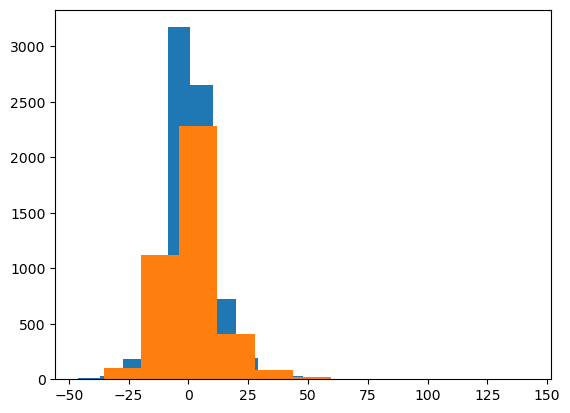

In [25]:
plt.hist(y_train, bins=20)
plt.hist(y_test)

## No prediction, just mean: 

In [26]:
y_pred_naive = y_test.mean(axis=0, keepdims=True)

In [27]:
y_pred_naive

array([1.36905973])

In [28]:
test(y_test, y_pred_naive * np.ones_like(y_test))

r2 	 0.0
mae 	 8.30280173108919
rmse 	 12.297365996512568


## Linear Regression? 

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
X_train

array([[-0.11161823, -1.12868895,  0.36327156, ...,  0.14816052,
        -0.47490379, -0.52042544],
       [-0.67309172,  1.77756582, -0.14533241, ...,  0.10428236,
        -0.47402286, -1.20687934],
       [-0.42867956,  1.28871386, -0.79840801, ..., -0.01875323,
        -0.47197109, -0.795007  ],
       ...,
       [ 0.53125349,  0.56169095,  0.09442206, ..., -0.34458096,
        -0.45754457,  1.2643547 ],
       [ 1.66383756,  0.68297623, -0.19191025, ...,  0.20641755,
        -0.47206436,  0.5779008 ],
       [ 0.47138448,  0.30135479,  0.3389034 , ..., -0.45953312,
        -0.46177808,  0.85248236]])

In [33]:
y_train

array([-1.73501577,  5.38336052, 19.19504644, ...,  9.42562592,
        4.24528302,  6.99186992])

In [34]:
lr = LinearRegression().fit(X_train, y_train)

In [35]:
test(y_test, lr.predict(X_test))

r2 	 -2.3502261290571707e+20
mae 	 5940161963.695373
rmse 	 188524120731.77567


## XGBoost Regressor

In [171]:
from xgboost import XGBRegressor

In [172]:
xgb_regressor = XGBRegressor().fit(X_train, y_train)

In [173]:
test(y_test, xgb_regressor.predict(X_test))

r2 	 -0.18093780259451986
mae 	 9.437122053404826
rmse 	 13.36366595393253


In [175]:
s = xgb_regressor.predict(X_test)
s[s>24]

array([29.8916  , 33.28779 , 25.288454, 25.389668, 25.613285, 24.730633,
       26.532574, 25.927853, 30.587038, 36.11293 , 29.31456 , 25.894583,
       27.751225, 25.244568, 34.268677, 25.109964], dtype=float32)

In [216]:
import pickle

# 保存模型
pickle.dump(xgb_regressor, open("./xgboost_regressor_100.pkl", "wb"))

FileNotFoundError: [Errno 2] No such file or directory: './xgboost_regressor_100.pkl'

## Gaussian Mixture Model

In [196]:
length_scale_param=1.0
length_scale_bounds_param=(1e-8, 1e8)
nu_param=2.5
matern=Matern(length_scale=length_scale_param,
              length_scale_bounds=length_scale_bounds_param,nu=nu_param)
kernel = matern + WhiteKernel()

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

/home/wbao4/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9)

In [197]:
gaussian_process.predict(X_train, True)

(array([ 2.20595028e+00,  1.55853851e+00,  1.11836726e+00,  9.36581362e-01,
         1.05056509e+00,  2.10467127e+00,  1.69635391e+00,  9.32492248e-01,
         8.08769060e-01,  5.90506537e-01,  3.46904077e-01,  4.08834796e-01,
         6.22022387e-01,  6.81223109e-01,  3.69586974e-01,  8.21502866e-02,
         3.94726158e-02, -5.09757034e-04, -7.53956075e-02, -5.36017773e-02,
         2.20178510e-02,  1.88712003e-01,  1.71775204e-01, -1.04441732e-01,
        -9.35446534e-02,  3.27820599e-02,  1.30126731e-01,  1.09920855e-01,
         1.96125643e-01,  9.18762517e-02,  4.89391542e-01,  2.20247010e+00,
         1.85307731e+00,  1.92946273e+00,  1.92764433e+00,  1.93068937e+00,
         1.99310694e+00,  2.10311576e+00,  2.24050799e+00,  1.61101523e+00,
         1.01419352e+00,  2.00845318e+00,  1.67665446e+00,  1.64396367e+00,
         1.58879022e+00,  1.53567862e+00,  9.59340294e-01,  3.36742243e-01,
         2.07182186e+00,  1.97869748e+00,  1.97745990e+00,  2.07102901e+00,
         2.0

**The prediction is weird on both test and train set.**